***Z Test***
\
Given population variance and population mean is known. Large datasize (n>30)

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
passport_df = pd.read_csv('BEML.csv')
passport_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [ ]:
print(list(passport_df.Close))

[1135.6, 1134.6, 1139.6, 1144.15, 1144.05, 1137.0, 1143.65, 1142.25, 1148.2, 1207.05, 1236.25, 1221.25, 1186.2, 1150.15, 1170.75, 1154.7, 1058.6, 1039.3, 1068.95, 1140.1, 1107.95, 1118.8, 1090.3, 1070.45, 1080.4, 1095.65, 1109.0, 1095.45, 1120.55, 1139.65, 1137.9, 1142.75, 1131.0, 1116.4, 1094.0, 1065.0, 1046.45, 1011.15, 1013.55, 1042.0, 1035.85, 1048.9, 1064.3, 1069.8, 1063.75, 1059.55, 1044.85, 1036.15, 1019.55, 1029.2, 1038.85, 1049.25, 1063.1, 1050.2, 1045.1, 1033.85, 1050.45, 1057.6, 1047.95, 1049.6, 1059.0, 1064.15, 1087.85, 1076.45, 1069.6, 1077.05, 1081.3, 1074.65, 1067.45, 1046.3, 1036.45, 1038.55, 1031.25, 1025.6, 1032.95, 1050.4, 1050.9, 1047.05, 1049.4, 1048.05, 1038.05, 1026.7, 1012.2, 1014.85, 988.25, 1006.5, 995.2, 995.0, 1009.4, 1005.05, 1002.65, 1048.6, 984.85, 991.05, 995.4, 999.5, 975.7, 976.7, 963.9, 981.3, 970.55, 965.0, 968.25, 994.0, 1000.55, 978.05, 996.75, 996.95, 999.3, 1001.15, 1013.7, 1011.55, 1010.4, 1013.75, 1021.85, 1036.35, 1021.2, 1027.5, 1003.7, 1008.

In [ ]:
from scipy import stats
import math

def z_test (pop_mean, pop_std, sample):
  z_score = (sample.mean()-pop_mean)/(pop_std/math.sqrt(len(sample)))
  return z_score, stats.norm.cdf(z_score)

In [ ]:
z_test(700,50, passport_df.Close)

(-1.305066635883301, 0.09593507921630612)

p-value > 5 hence Null Hypothesis is retained and processing value is greated than 700.

***One-Sample t-test***

In [ ]:
#Popukation statdard deviation is unknown

stats.ttest_1samp(passport_df.Close,700)

Ttest_1sampResult(statistic=-0.18256261522448428, pvalue=0.8551625117700151)

**Two-Sample t_Test**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


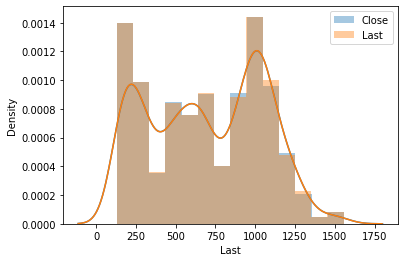

In [ ]:
#When Sigam unknown, Given test different between 2 population means

sn.distplot(passport_df['Close'], label='Close')
sn.distplot(passport_df['Last'], label='Last')
plt.legend()

In [ ]:
stats.ttest_ind(passport_df['Close'],passport_df['Last'])

Ttest_indResult(statistic=0.0018028981577119154, pvalue=0.9985615996307708)

**Paired Sample t-Test**

In [ ]:
#When an event is measured before and after an intervnetion

stats.ttest_rel(passport_df['Close'],passport_df['Last'])

Ttest_relResult(statistic=0.2561324646819162, pvalue=0.7978788665287452)

**Chi-Squared Goodness of Fit Test**

In [ ]:
#non-parametrci test - Compare observed and expected distribution

#Observed frequencies
f_obs=[190,195,90,35]
#Expected frequencies
f_exp=[500*.35, 500*.4,500*.2, 500*0.05]
f_exp

[175.0, 200.0, 100.0, 25.0]

In [ ]:
stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=6.410714285714286, pvalue=0.09325100615179929)

**ANOVA**
- Compare mean values simultaneously for >2 groups

In [ ]:
from scipy.stats import f_oneway
f_oneway(passport_df['Close'],passport_df['Last'],passport_df['High'])

F_onewayResult(statistic=1.0029253940836167, pvalue=0.3668755723096014)